# Analyzing Popular App Categories on Google Play Project
In this project, our Goal is to figure out what types of apps tend to be popular on the google play store.We work for a company that makes free apps and earn money through ads. By understanding which app Categories are in high demand. We can help our developers create apps that attrack more users and generate more revenue. We will Analyze date from Google play store to identify patterns and preferences among users. This way,we can make smarter decisions about the kind of apps we develops.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the database in pandas dataframe object
android_df=pd.read_csv("googleplaystore.csv")

In [3]:
#Explore the data using pandas method
android_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
android_df["Category"].value_counts()


FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [5]:
android_df[android_df["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
android_df[android_df["Category"]=="1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [7]:
clean_1st=['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE','1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone','LIFESTYLE' , 'February 11, 2018',
        '1.0.19', '4.0 and up']
clean_1st

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [8]:
android_df[android_df["Category"]=="1.9"]=clean_1st

In [9]:
android_category=android_df["Category"].value_counts()
android_category

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [10]:
app_count=android_df["App"].value_counts()
app_count

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [11]:
app_count[app_count >1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

In [12]:
"Instagram" in app_count[app_count >1].index

True

In [13]:
android_df[android_df["App"]== "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [14]:
# check for duplicate rows based on "App" column marking all duplicates as True
duplicate_apps_df=android_df[android_df.duplicated(subset=["App"],keep=False)]
#keep=false means show all duplicates 
duplicate_apps_df[duplicate_apps_df["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [15]:
#number of duplicate app
num_duplicate_apps=duplicate_apps_df["App"].nunique()
num_duplicate_apps

798

In [16]:
duplicate_apps_df.shape

(1979, 13)

In [17]:
android_df.shape

(10841, 13)

In [18]:
10841-1181

9660

# Part two

In [19]:
#Group by "App" and get the maximum number of reviews for each app
reviews_max=android_df.groupby("App")["Reviews"].max()
reviews_max["Instagram"]

'66577446'

In [20]:
reviews_max

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [21]:
#create an empty list to store clean data
android_clean = []
#create an empty list to keep track of  already added app
already_added = []
#iterate through each row in the dataframe
for index, row in android_df.iterrows():
    name = row['App']
    n_reviews = row['Reviews']
    
    #check if the current app has the maximum number of reviews and has not been added before
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(row) #add the app tothe clean list
        already_added.append(name) #add the app name to the list of already added apps
        

In [22]:
android_clean = pd.DataFrame(android_clean)

In [23]:
android_clean.shape

(9660, 13)

# Removing Non-Engliish Apps 
# Part one
If you explore the data sets enough,you will notice the names of some of the apps suggest 
they are not directed towards an English-Speaking audience.Below we see a couple of 
examples from both data sets.

In [24]:
ord("A")

65

In [25]:
ord("a")

97

In [26]:
chr(125)

'}'

In [27]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    check = set(lst)
    if False in check:
        return False
    else:
        return True


In [28]:
for i in "sania":
    print(i)

s
a
n
i
a


In [29]:
is_english("Instagram😍")

False

In [30]:
is_english("Instagram")

True

# Part Two

In [31]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii += 1
    if non_ascii > 3:
        return False
    else:
        return True


In [32]:
is_english("english jokes 😊😊 😊😊 ")

False

In [33]:
is_english("insta")

True

In [34]:
android_clean["App"].apply(is_english)

0        True
2        True
3        True
4        True
5        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: App, Length: 9660, dtype: bool

In [35]:
android_english = android_clean[android_clean["App"].apply(is_english)]

In [36]:
android_english.shape

(9615, 13)

In [37]:
android_english.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# Isolating the Free Apps
As we mentioned in the introduction,we only build apps that are free to downloaded and install, and our main source of revenue consist of in_app ads.Our data set contains both free and non_free apps and we will neeed to isolate only the free apps for our analysis. Below,we isolate for both our data sets.

In [38]:
android_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [39]:
android_final = android_english[android_english["Price"]=="0"]

In [40]:
android_final.shape

(8863, 13)

# Most Common Apps by Genre 

In [41]:
#Analysis

In [42]:
android_final["Category"].value_counts(normalize=True)*True

FAMILY                 0.189326
GAME                   0.096920
TOOLS                  0.084509
BUSINESS               0.045921
LIFESTYLE              0.039152
PRODUCTIVITY           0.038926
FINANCE                0.037008
MEDICAL                0.035203
SPORTS                 0.033961
PERSONALIZATION        0.033172
COMMUNICATION          0.032382
HEALTH_AND_FITNESS     0.030802
PHOTOGRAPHY            0.029448
NEWS_AND_MAGAZINES     0.027981
SOCIAL                 0.026628
TRAVEL_AND_LOCAL       0.023356
SHOPPING               0.022453
BOOKS_AND_REFERENCE    0.021437
DATING                 0.018617
VIDEO_PLAYERS          0.017940
MAPS_AND_NAVIGATION    0.013991
FOOD_AND_DRINK         0.012411
EDUCATION              0.011734
ENTERTAINMENT          0.009590
LIBRARIES_AND_DEMO     0.009365
AUTO_AND_VEHICLES      0.009252
HOUSE_AND_HOME         0.008236
WEATHER                0.008011
EVENTS                 0.007108
PARENTING              0.006544
ART_AND_DESIGN         0.006431
COMICS  

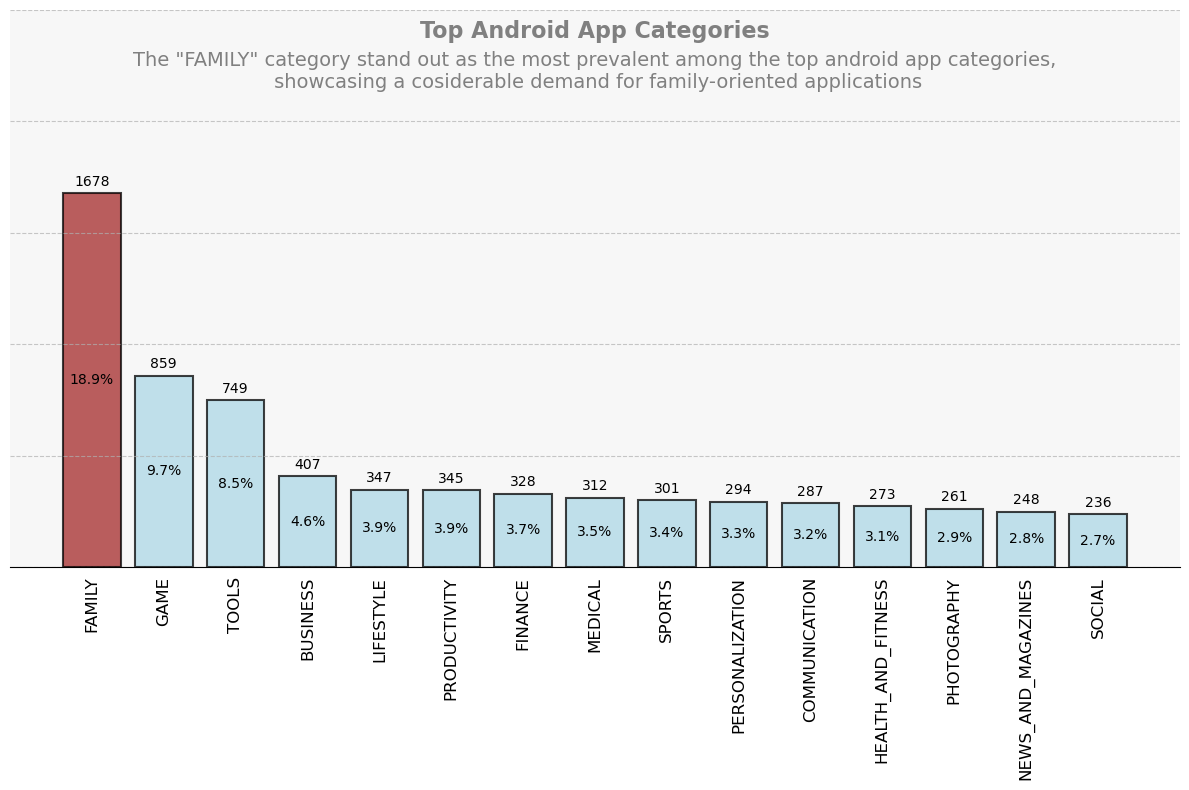

In [43]:
#Data
categories = android_final["Category"].value_counts().index[:15]
counts = android_final["Category"].value_counts().values[:15]
percentage = round(android_final["Category"].value_counts(normalize = True)*100,1)[:15]

#create stylish bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(categories,counts,color="lightblue", alpha=0.75, edgecolor="black", linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle= '--', alpha=0.7)
plt.grid(axis="x", linestyle= '')
plt.xticks(fontsize=12) #customized tick tables
plt.yticks(range(0,3000,500),[],fontsize=12) # customized tick table and customized y_tick table
plt.tick_params(bottom=0, left=0)

#find the category with the highest count
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('brown')
bars[max_count_index].set_edgecolor('black')

#adding data labels and percentage inside each bar
for bar, perc in zip(bars,percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d' % int(height), ha= 'center', va='bottom',fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha= 'center', va='center',fontsize=10,color='black')

#adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

#adding chart title inside the chart
plt.text(0.5,0.95,'Top Android App Categories',horizontalalignment='center',fontsize=16,transform=plt.gca().transAxes,
         color='gray',fontweight='bold')

#adding conclusion inside the chart
plt.text(0.5,0.86,'The "FAMILY" category stand out as the most prevalent among the top android app categories,\n showcasing a cosiderable demand for family-oriented applications', horizontalalignment='center',fontsize=14,transform=plt.gca().transAxes,
         color='gray')

#remove spines
for i in ["top","right","left",]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout() #adjust layout to prevent clipping
plt.show()


In [44]:
android_final[android_final["Category"]=="FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


# Most Popular App by genre on Google Play Store
For the google play market, we actually have data baout the number of install, so we should be able to get a clearer picture genre popularity. However the install number don't seem precise enough--we can see the most values are open ended (100,+1000,+5000 etc).

In [45]:
android_final["Installs"].value_counts(normalize = True)*100

1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

In [46]:
android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)

C:\Users\hassa\AppData\Local\Temp\ipykernel_17908\3840374705.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)
C:\Users\hassa\AppData\Local\Temp\ipykernel_17908\3840374705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)


In [47]:
install_frq = android_final["Installs_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq 

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [48]:
install_frq_per = round(android_final["Installs_int"].value_counts(normalize = True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500]
install_frq_per

1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: Installs_int, dtype: float64

In [49]:
#alphanumeric_units
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'     

In [50]:
alphanumeric_units(1000000000)

'1B'

In [51]:
install_frq.index

Int64Index([      1000,       5000,      10000,      50000,     100000,
                500000,    1000000,    5000000,   10000000,   50000000,
             100000000,  500000000, 1000000000],
           dtype='int64')

In [52]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq.index

Index(['1K', '5K', '10K', '50K', '100K', '500K', '1M', '5M', '10M', '50M',
       '100M', '500M', '1B'],
      dtype='object')

In [53]:
install_frq

1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: Installs_int, dtype: int64

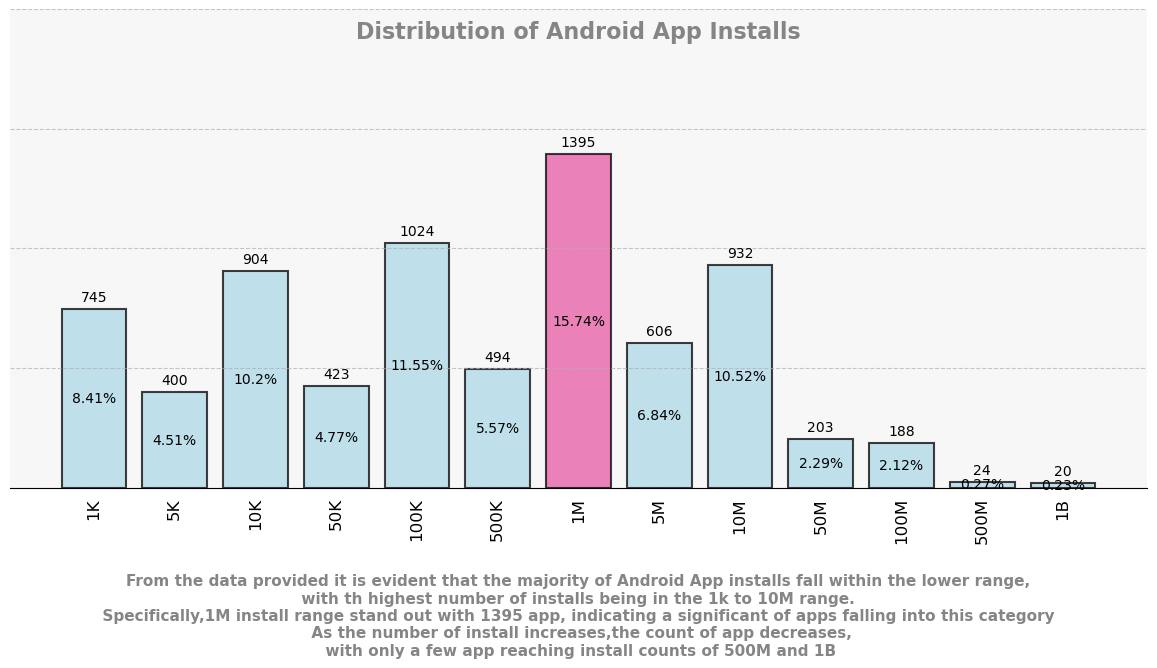

In [54]:
# Data
categories = install_frq.index
counts = install_frq.values
percentage = install_frq_per.values

#create stylish bar chart
plt.figure(figsize=(12,7))
bars = plt.bar(categories,counts,color='lightblue',alpha=0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.grid(axis='x',linestyle='')
plt.xticks(fontsize=12) #customized tick table
plt.yticks(range(0,2500,500),[],fontsize=12) #customized tick label and customized y tick range
plt.tick_params(bottom=0,left=0)

#find the category with the highest count
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count
max_count_index = list( categories).index(max_count_category)
bars[max_count_index].set_color('#E65BA5')
bars[max_count_index].set_edgecolor('black')

#adding data labels and percentage inside each bar
for bar,perc in zip(bars,percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, '%d' % int(height), ha='center',va='bottom',fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%' ,ha='center',va='center',fontsize=10,color='black')

#adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')

#adding chart title inside the chart
plt.text(0.5,0.94,'Distribution of Android App Installs',horizontalalignment='center', fontsize=16,transform=plt.gca().transAxes,
        color='#858585',fontweight='bold')

#adding conclusion inside the chart
plt.text(0.5,-0.35,'From the data provided it is evident that the majority of Android App installs fall within the lower range,\n with th highest number of installs being in the 1k to 10M range. \n Specifically,1M install range stand out with 1395 app, indicating a significant of apps falling into this category \n As the number of install increases,the count of app decreases,\n with only a few app reaching install counts of 500M and 1B',
        horizontalalignment='center',fontsize=11,transform=plt.gca().transAxes, color = "#858585",fontweight="bold")

# remove spines 
for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout() #adjust layout to prevent clipping
plt.show()

In [55]:
categories_android = android_final["Category"].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [56]:
pd.pivot_table(android_final, values="Installs_int",index="Category",aggfunc="mean")

,Installs_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [57]:
#display DataFrame without scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [58]:
categories_installs = pd.pivot_table(android_final, values="Installs_int",index="Category",aggfunc="mean")
categories_installs = categories_installs.sort_values(by="Installs_int", ascending=False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [59]:
#alphanumeric_units
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'  

In [60]:
categories_installs_units = categories_installs.map(alphanumeric_units)
categories_installs_units

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

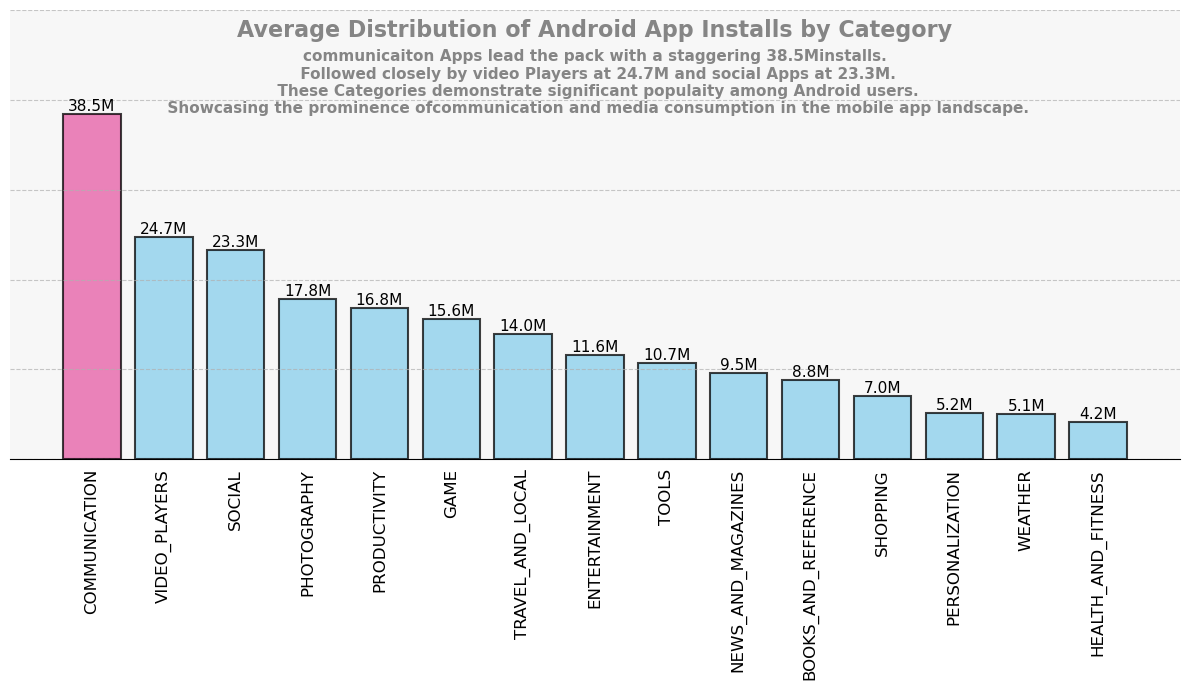

In [61]:
# Data
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

# create stylish bar
plt.figure(figsize=(12,7))
bars = plt.bar(categories,counts,color="skyblue",alpha=0.75,edgecolor="black",linewidth=1.5)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.grid(axis='x',linestyle='')
plt.xticks(fontsize=12) #customized tick table
plt.yticks(range(0,60000000,10000000),[],fontsize=12) #customized tick label and customized y tick range
plt.tick_params(bottom=0,left=0)

#find the category with the highest count
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count
max_count_index = list( categories).index(max_count_category)
bars[max_count_index].set_color('#E65BA5')
bars[max_count_index].set_edgecolor('black')

#adding data labels and percentage inside each bar
for bar,units in zip(bars,categories_installs_units.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 25, units , ha='center',va='bottom',fontsize=11)
    
#adding a background color
ax = plt.gca()
ax.set_facecolor('#f7f7f7')
    
#adding chart title inside the chart
plt.text(0.5,0.94,'Average Distribution of Android App Installs by Category',horizontalalignment='center',fontsize=16,transform=plt.gca().transAxes,
        color='#858585',fontweight='bold') 

#adding conclusion inside the chart
plt.text(0.5,0.77,'communicaiton Apps lead the pack with a staggering 38.5Minstalls.\n Followed closely by video Players at 24.7M and social Apps at 23.3M.\n These Categories demonstrate significant populaity among Android users.\n Showcasing the prominence ofcommunication and media consumption in the mobile app landscape.',
        horizontalalignment='center',fontsize=11,transform=plt.gca().transAxes, color = "#858585",fontweight="bold")

# remove spines 
for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)
    
plt.tight_layout() #adjust layout to prevent clipping
plt.show()

In [62]:
category_group = android_final.groupby("Category")

In [63]:
communication = category_group.get_group('COMMUNICATION').sort_values(by="Installs_int",ascending=False)
communication.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [64]:
#alphanumeric_units
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.1f}'  

In [65]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [66]:
df=communication[['App','Installs_int']].head(15)
df['App','Installs_int_unit']= df['Installs_int'].map(alphanumeric_units)
df

,App,Installs_int,"(App, Installs_int_unit)"
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [67]:
df = category_group.get_group('VIDEO_PLAYERS').sort_values(by="Installs_int",ascending=False)
df = df[['App','Installs_int']].head(15)
df['App','Installs_int_unit']= df['Installs_int'].map(alphanumeric_units)
df

,App,Installs_int,"(App, Installs_int_unit)"
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


In [68]:
df = category_group.get_group('SOCIAL').sort_values(by="Installs_int",ascending=False)
df = df[['App','Installs_int']].head(15)
df['App','Installs_int_unit']= df['Installs_int'].map(alphanumeric_units)
df

,App,Installs_int,"(App, Installs_int_unit)"
2544,Facebook,1000000000,1B
2554,Google+,1000000000,1B
2604,Instagram,1000000000,1B
2610,Snapchat,500000000,500M
2546,Facebook Lite,500000000,500M
3945,Tik Tok - including musical.ly,100000000,100M
2592,Tango - Live Video Broadcast,100000000,100M
6373,VK,100000000,100M
2552,Pinterest,100000000,100M
3951,BIGO LIVE - Live Stream,100000000,100M


In [69]:
df = category_group.get_group('PHOTOGRAPHY').sort_values(by="Installs_int",ascending=False)
df = df[['App','Installs_int']].head(15)
df['App','Installs_int_unit']= df['Installs_int'].map(alphanumeric_units)
df

,App,Installs_int,"(App, Installs_int_unit)"
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


In [70]:
df = category_group.get_group('TOOLS').sort_values(by="Installs_int",ascending=False)
df = df[['App','Installs_int']].head(15)
df['App','Installs_int_unit']= df['Installs_int'].map(alphanumeric_units)
df

,App,Installs_int,"(App, Installs_int_unit)"
3234,Google,1000000000,1B
3265,Gboard - the Google Keyboard,500000000,500M
3255,SHAREit - Transfer & Share,500000000,500M
4005,Clean Master- Space Cleaner & Antivirus,500000000,500M
3235,Google Translate,500000000,500M
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000,500M
8452,Automatic Call Recorder,100000000,100M
3266,Google Korean Input,100000000,100M
7550,Battery Doctor-Battery Life Saver & Battery Co...,100000000,100M
3272,Share Music & Transfer Files - Xender,100000000,100M


  # Analysis of Photography Category and Potential for Photo Generation in 2024
# Conclusion 
The analysis of the photography sector reveals a notable trend towards the popularity of photo editing and collage-making applications. These apps have garnered significant attention, with several platforms amassing over 100 million installations. This trend indicates a robust demand for photo-related functionalities among users. 

Given this observation, there appears to be significant potential for the development of a photo generation application in 2024. Such an app, offering prompt and free generation of pictures and photos, could capitalize on the existing user interest in photography apps, stand out in the competitive market, and attract a large user base. 

Considering the success of existing photography apps and the evolving preferences of users, investing in the development of a photography app seems promising for tapping into this lucrative market segment in 2024.




